Goal:
1. The amount of "Calories, Protein, Fat, Water etc" in the foods are presented in the table. Considering this table, it was aimed to determine the calorie amount of the food to be added later.
2. A clustering process has been made according to the characteristics of the food.

Result:
1. By applying the 1st Regression process, the value of the Ridge 0.99275 predicted rate was found.
2. This value was found 0.96241 by applying Deep Learning.
3. Clustering and dividing the data into 4 groups.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [19]:
df=pd.read_csv("Nutritions_US.csv",encoding = 'ISO-8859-1')

In [20]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded"


In [21]:
df.tail()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,0.0,66.0,1.40,60.0,254.0,520.0,4450.0,1.10,0.100,NaN,73.4,0.0,0.020,0.190,3.300,NaN,0.410,15.0,0.0,15.0,15.0,101.6,12.00,157.0,47.0,47.0,0.0,0.0,0.0,0.0,0.0,2.38,25.2,1006.0,7.8,7.148,8.320,6.210,95.0,80.0,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless"
8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,0.0,10.0,0.58,37.0,426.0,314.0,667.0,1.55,0.033,0.029,21.7,0.0,0.012,0.024,1.076,0.366,0.112,20.0,0.0,20.0,20.0,110.7,2.15,5.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,0.0,0.218,0.082,0.222,41.0,85.0,3 oz,NaN,NaN
8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,73.2,13.0,3.60,10.0,8.0,63.0,58.0,0.19,0.020,NaN,0.7,0.0,0.130,0.060,0.100,NaN,0.000,0.0,0.0,0.0,0.0,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,21.0,1 serving,NaN,NaN
8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,0.0,10.0,3.50,250.0,272.0,382.0,70.0,1.00,0.400,NaN,27.4,0.0,0.010,0.120,1.400,NaN,0.130,6.0,0.0,6.0,6.0,65.0,0.50,100.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,5.00,0.0,0.0,0.1,0.361,0.259,0.252,50.0,85.0,3 oz,NaN,NaN
8789,93600,"TURTLE,GREEN,RAW",78.50,89,19.80,0.50,1.20,0.00,0.0,0.0,118.0,1.40,20.0,180.0,230.0,68.0,1.00,0.250,NaN,16.8,0.0,0.120,0.150,1.100,NaN,0.120,15.0,0.0,15.0,15.0,65.0,1.00,100.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.1,0.127,0.088,0.170,50.0,85.0,3 oz,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             8790 non-null   int64  
 1   Shrt_Desc          8790 non-null   object 
 2   Water_(g)          8789 non-null   float64
 3   Energ_Kcal         8790 non-null   int64  
 4   Protein_(g)        8790 non-null   float64
 5   Lipid_Tot_(g)      8790 non-null   float64
 6   Ash_(g)            8465 non-null   float64
 7   Carbohydrt_(g)     8790 non-null   float64
 8   Fiber_TD_(g)       8196 non-null   float64
 9   Sugar_Tot_(g)      6958 non-null   float64
 10  Calcium_(mg)       8442 non-null   float64
 11  Iron_(mg)          8646 non-null   float64
 12  Magnesium_(mg)     8051 non-null   float64
 13  Phosphorus_(mg)    8211 non-null   float64
 14  Potassium_(mg)     8364 non-null   float64
 15  Sodium_(mg)        8707 non-null   float64
 16  Zinc_(mg)          8084 

In [26]:
df["Shrt_Desc"]=df["Shrt_Desc"].str.lower().str.replace(","," ")

In [32]:
for column in df.select_dtypes(include=np.number):
    df[column].fillna(0,inplace=True)

In [37]:
df["GmWt_Desc1"].fillna("None",inplace=True)
df["GmWt_Desc2"].fillna("None",inplace=True)

In [96]:
df.isnull().sum()

Shrt_Desc            0
Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(¾g)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(¾g)      0
Folic_Acid_(¾g)      0
Food_Folate_(¾g)     0
Folate_DFE_(¾g)      0
Choline_Tot_ (mg)    0
Vit_B12_(¾g)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(¾g)         0
Alpha_Carot_(¾g)     0
Beta_Carot_(¾g)      0
Beta_Crypt_(¾g)      0
Lycopene_(¾g)        0
Lut+Zea_ (¾g)        0
Vit_E_(mg)           0
Vit_D_¾g             0
Vit_D_IU             0
Vit_K_(¾g)           0
FA_Sat_(g) 

In [39]:
df.sample(3)

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
4407,14450,beverages drk mix quaker oats gatorade orange ...,2.51,388,0.00,1.23,2.15,94.11,0.0,80.50,40.0,0.34,1.0,120.0,30.0,63.0,0.06,0.250,0.050,0.0,0.4,0.011,0.802,0.220,0.055,0.022,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,23.0,"1 scoop, powder",207.0,"1 cup, powder"
3886,13443,"beef loin tenderloin steak bnless ln 0"" fat ch...",60.21,211,30.45,9.03,1.39,0.00,0.0,0.00,17.0,4.12,23.0,321.0,443.0,71.0,5.65,0.109,0.012,31.4,0.0,0.071,0.500,7.071,0.471,0.868,7.0,0.0,7.0,7.0,73.8,5.18,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.28,0.1,3.0,1.6,3.576,4.114,0.640,93.0,85.0,3 oz,121.0,1 steak
8491,36039,restaurant family style hash browns,59.85,197,2.49,8.99,2.08,26.59,2.7,1.38,17.0,0.56,26.0,71.0,416.0,468.0,0.29,0.066,0.168,0.0,0.0,0.007,0.048,2.170,0.455,0.203,23.0,0.0,23.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,0.0,0.0,32.6,1.689,2.035,5.029,0.0,94.0,1 cup,124.0,1 serving


## Regression
guessing the calories of foods

In [43]:
df.drop("NDB_No",axis=1,inplace=True)

In [47]:
df.corr()

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2
Water_(g),1.000000,-0.900535,-0.103833,-0.489584,-0.235744,-0.774010,-0.385601,-0.457883,-0.237414,-0.349057,-0.391178,-0.290640,-0.200500,-0.157078,-0.149319,-0.140070,-0.067401,-0.049426,-0.013933,-0.289896,-0.264575,-0.275259,-0.092365,-0.228376,-0.326657,-0.246593,-0.123062,-0.266633,-0.014874,0.013203,0.011636,-0.023366,-0.027807,0.042812,0.065948,0.003168,0.038339,0.072780,-0.231762,-0.057984,-0.057947,0.020771,-0.367960,-0.390598,-0.399317,0.055348,0.396132,0.147064
Energ_Kcal,-0.900535,1.000000,0.112636,0.806677,0.083260,0.493028,0.202065,0.315796,0.124892,0.196225,0.262945,0.200714,0.081643,0.055920,0.114401,0.102508,0.037305,0.057584,-0.032983,0.186639,0.154218,0.174282,0.061826,0.119251,0.184394,0.139003,0.051113,0.143986,0.038677,-0.013957,-0.029806,0.025552,0.035004,-0.053661,-0.086297,-0.021632,-0.051792,-0.088871,0.303858,0.074981,0.074914,-0.024115,0.619119,0.676569,0.595191,0.015090,-0.389617,-0.088113
Protein_(g),-0.103833,0.112636,1.000000,0.062336,0.106315,-0.304295,-0.074143,-0.269321,0.046245,0.128590,0.217982,0.444553,0.248371,-0.003170,0.422067,0.153353,0.034820,0.383919,-0.064406,0.102427,0.213512,0.394060,0.238167,0.244223,0.008987,-0.030489,0.117105,0.008249,0.407901,0.250290,-0.021469,0.028668,0.043655,-0.057550,-0.090050,-0.029629,-0.054799,-0.081523,-0.028482,0.018185,0.018243,-0.071973,0.052530,0.094276,-0.039389,0.290245,-0.149047,0.193043
Lipid_Tot_(g),-0.489584,0.806677,0.062336,1.000000,-0.005906,-0.048594,-0.023089,-0.000276,0.016833,-0.035627,0.082351,0.074428,-0.036830,0.011052,0.032113,0.047716,0.001097,0.038995,-0.057367,-0.001632,-0.031554,-0.018254,0.008609,-0.041972,-0.049436,-0.047979,-0.029437,-0.054963,0.048824,-0.020914,-0.020569,0.025133,0.033737,-0.041223,-0.057795,-0.015263,-0.040837,-0.061643,0.337699,0.073140,0.073059,0.015055,0.764603,0.868514,0.703962,0.087229,-0.256681,0.003930
Ash_(g),-0.235744,0.083260,0.106315,-0.005906,1.000000,0.119708,0.179003,0.006669,0.474304,0.197636,0.258841,0.414972,0.350531,0.813908,0.081697,0.091861,0.060103,0.054288,0.043199,0.130019,0.148580,0.122815,0.089984,0.115333,0.117955,0.082138,0.119940,0.114039,0.069066,0.017736,0.050887,0.016709,0.012831,0.010740,0.033048,0.028483,0.037471,0.010531,0.054890,0.022577,0.022641,0.062480,-0.023510,-0.001901,0.016658,-0.006389,-0.130826,-0.049805
Carbohydrt_(g),-0.774010,0.493028,-0.304295,-0.048594,0.119708,1.000000,0.455710,0.617259,0.189064,0.344312,0.283977,0.073324,0.117867,0.075554,-0.015402,0.063149,0.055516,-0.115557,0.069566,0.274447,0.220383,0.160663,0.001544,0.179870,0.380982,0.309885,0.099611,0.318637,-0.170225,-0.098181,0.002253,-0.000719,-0.005796,-0.002952,-0.008999,0.013916,-0.001989,-0.015369,0.072081,0.014612,0.014592,-0.011403,-0.043835,-0.096127,0.054849,-0.219735,-0.220803,-0.232494
Fiber_TD_(g),-0.385601,0.202065,-0.074143,-0.023089,0.179003,0.455710,1.000000,0.107561,0.233700,0.380423,0.540110,0.159339,0.326529,0.010007,0.082783,0.185536,0.102737,-0.034297,0.068086,0.203500,0.152224,0.128682,0.067163,0.235151,0.306013,0.156927,0.320527,0.242977,-0.067279,-0.054569,0.107086,0.005424,-0.019747,0.064488,0.143116,0.120142,0.024727,0.096958,0.153374,-0.011303,-0.011272,0.155161,-0.075663,-0.030789,0.073603,-0.145824,-0.076920,-0.148700
Sugar_Tot_(g),-0.457883,0.315796,-0.269321,-0.000276,0.006669,0.617259,0.107561,1.000000,0.125703,0.113846,0.041107,-0.053286,-0.005767,0.005118,-0

In [48]:
df.describe()

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2
count,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000
mean,54.106061,226.317634,11.342849,10.553725,1.717527,22.127710,2.039625,6.762531,73.700114,2.655447,32.328555,154.264164,265.928328,309.545165,1.947369,0.167958,0.496425,12.575688,8.372082,0.207039,0.234561,3.392651,0.484946,0.261515,44.196018,17.794539,19.616951,49.234243,23.677861,1.203482,676.292947,92.215358,71.325825,19.822639,141.701706,6.671672,98.225711,120.817520,0.893890,0.364300,14.591809,9.295370,3.434338,3.771797,2.115612,38.718885,93.105193,137.640216
std,30.776516,169.877539,10.530474,15.814842,2.967679,27.270822,4.267904,13.723474,200.017998,5.651177,55.816105,202.043448,371.155815,939.452380,3.346134,0.543675,6.301566,28.050321,65.627097,0.507800,0.438182,4.741533,1.252370,0.467871,127.710553,100.830553,56.621574,183.509279,51.328654,4.271949,3694.534015,771.478769,761.415298,255.207074,1030.697731,123.181752,1107.608225,911.174861,3.853351,3.091688,123.670680,62.125274,6.426162,6.825884,5.050857,117.353035,84.713057,309.447941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.692500,91.000000,2.380000,0.950000,0.770000,0.050000,0.000000,0.000000,8.000000,0.500000,10.000000,36.000000,112.000000,38.000000,0.220000,0.028000,0.000000,0.100000,0.000000,0.030000,0.047000,0.374000,0.000000,0.035000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149000,0.074250,0.134250,0.000000,28.350000,0.000000
50%,63.080000,191.000000,8.000000,5.140000,1.170000,9.340000,0.400000,0.490000,19.000000,1.325000,20.000000,130.000000,220.000000,86.000000,0.800000,0.077000,0.022000,4.000000,0.000000,0.077000,0.151000,2.110000,0.275000,0.119000,9.000000,0.000000,6.000000,7.000000,1.650000,0.070000,20.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,1.435500,1.600000,0.591500,2.000000,85.000000,15.000000
75%,77.960000,337.000000,19.880000,13.720000,2.020000,34.910000,2.400000,6.057500,64.000000,2.570000,29.000000,215.000000,329.000000,401.000000,2.670000,0.140000,0.223000,21.300000,2.500000,0.226000,0.260000,5.059500,0.627750,0.358000,35.000000,0.000000,17.000000,25.000000,29.300000,1.270000,208.000000,21.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.470000,0.000000,1.000000,1.900000,4.173750,4.759000,1.880000,65.000000,128.000000,186.000000
max,100.000000,902.000000,88.320000,100.000000,9

In [78]:
abs(df.corr()["Energ_Kcal"].sort_values(ascending=False))

Energ_Kcal           1.000000
Lipid_Tot_(g)        0.806677
FA_Mono_(g)          0.676569
FA_Sat_(g)           0.619119
FA_Poly_(g)          0.595191
Carbohydrt_(g)       0.493028
Sugar_Tot_(g)        0.315796
Vit_E_(mg)           0.303858
Magnesium_(mg)       0.262945
Fiber_TD_(g)         0.202065
Phosphorus_(mg)      0.200714
Iron_(mg)            0.196225
Thiamin_(mg)         0.186639
Folate_Tot_(¾g)      0.184394
Niacin_(mg)          0.174282
Riboflavin_(mg)      0.154218
Folate_DFE_(¾g)      0.143986
Folic_Acid_(¾g)      0.139003
Calcium_(mg)         0.124892
Vit_B6_(mg)          0.119251
Zinc_(mg)            0.114401
Protein_(g)          0.112636
Copper_mg)           0.102508
Ash_(g)              0.083260
Potassium_(mg)       0.081643
Vit_D_¾g             0.074981
Vit_D_IU             0.074914
Panto_Acid_mg)       0.061826
Selenium_(¾g)        0.057584
Sodium_(mg)          0.055920
Food_Folate_(¾g)     0.051113
Choline_Tot_ (mg)    0.038677
Manganese_(mg)       0.037305
Retinol_(¾

<AxesSubplot:>

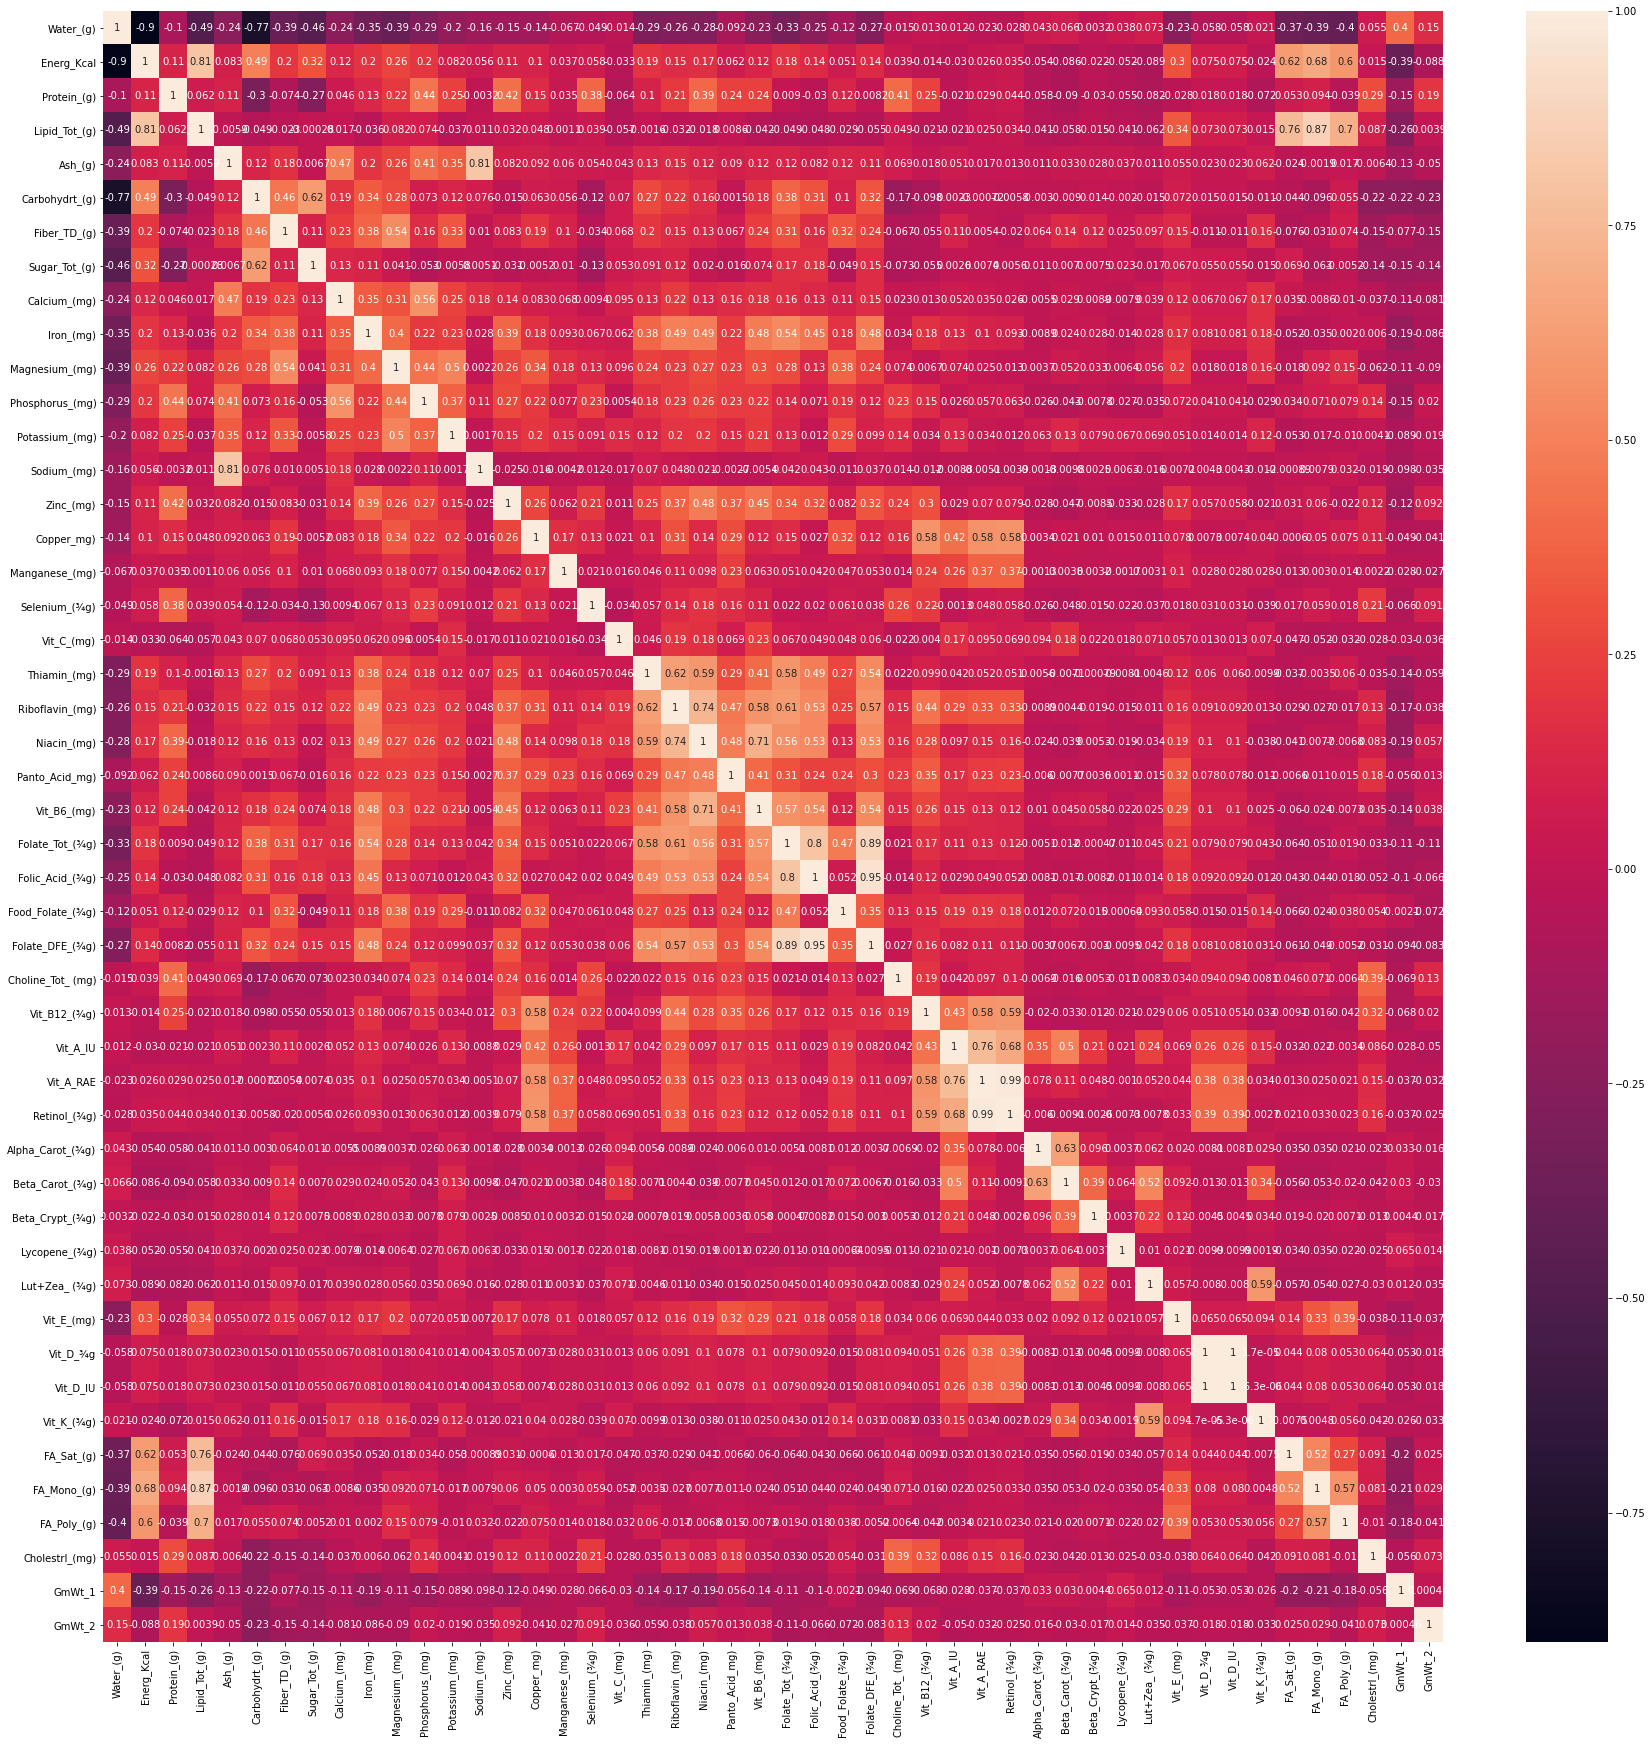

In [54]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

In [46]:
df_reg=df
df_reg=pd.get_dummies(df_reg,drop_first=True)
df_reg.shape

(8790, 10666)

In [56]:
df_reg

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(¾g),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(¾g),Folic_Acid_(¾g),Food_Folate_(¾g),Folate_DFE_(¾g),Choline_Tot_ (mg),Vit_B12_(¾g),Vit_A_IU,Vit_A_RAE,Retinol_(¾g),Alpha_Carot_(¾g),Beta_Carot_(¾g),Beta_Crypt_(¾g),Lycopene_(¾g),Lut+Zea_ (¾g),Vit_E_(mg),Vit_D_¾g,Vit_D_IU,Vit_K_(¾g),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Shrt_Desc_abalone mxd sp ckd fried,Shrt_Desc_abiyuch raw,...,"GmWt_Desc2_2 tbsp, creamy","GmWt_Desc2_2 tbsp, whipped",GmWt_Desc2_20 small,GmWt_Desc2_200 ml,GmWt_Desc2_22 chips,GmWt_Desc2_3 flowerets,GmWt_Desc2_3 fruit,"GmWt_Desc2_3 fruit, without pits thawed","GmWt_Desc2_3 links, 1 NLEA serving",GmWt_Desc2_3 oz,"GmWt_Desc2_3 oz, grilled patties",GmWt_Desc2_3 pieces,"GmWt_Desc2_3 pieces, (mean serving weight, aggregated over brands)","GmWt_Desc2_3 sets, waffle minis",GmWt_Desc2_3 slices,GmWt_Desc2_3 stalks,"GmWt_Desc2_3 tbsp, (1 NLEA serving)",GmWt_Desc2_4 large,GmWt_Desc2_4 mushrooms,GmWt_Desc2_4 oz,GmWt_Desc2_4 patty,GmWt_Desc2_4 pieces,"GmWt_Desc2_4 spears, (1/2"" base)","GmWt_Desc2_4 tbsp, (1/4 cup)",GmWt_Desc2_4 waterchestnuts,GmWt_Desc2_45 g,"GmWt_Desc2_5 cracker, (1 NLEA serving)","GmWt_Desc2_5 crackers, regular size, round (1 serving)",GmWt_Desc2_5 fl oz,"GmWt_Desc2_5 package, (5 oz)",GmWt_Desc2_5 pieces,"GmWt_Desc2_5 prunes, with liquid",GmWt_Desc2_50 berries,"GmWt_Desc2_6 crackers, Triscuits, regular size",GmWt_Desc2_6 fl oz,"GmWt_Desc2_6 inch, sub",GmWt_Desc2_6 medium,GmWt_Desc2_6 pieces,GmWt_Desc2_6 saltines,GmWt_Desc2_7 pieces,"GmWt_Desc2_7 sausages, (drained contents from can, net wt 4 oz)","GmWt_Desc2_8 bottle, 8 fl oz",GmWt_Desc2_8 crayfish,GmWt_Desc2_8 fl oz,"GmWt_Desc2_8 fl oz, (1 serving)",GmWt_Desc2_8 oz,"GmWt_Desc2_8 pods, (3"" long)","GmWt_Desc2_8 wafers, mini wafers",GmWt_Desc2_9 sprigs,GmWt_Desc2_None
0,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,14.2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,9.4,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,205.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,17.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,113.0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [57]:
x,y=df_reg.drop("Energ_Kcal",axis=1),df_reg[["Energ_Kcal"]]

In [58]:
x.shape,y.shape

((8790, 10665), (8790, 1))

In [59]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [60]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
Ridge,0.992757,14.701583,5.692980
LinearRegression,0.992740,14.719189,5.681556
Lasso,0.992009,15.442477,6.172823
ElasticNet,0.991996,15.455286,6.213567
GradientBoostingRegressor,0.991394,16.025671,7.667904
ExtraTreeRegressor,0.983874,21.937521,9.488055
KNeighborsRegressor,0.794076,78.391857,46.574289


## If deep learning is applied?

In [61]:
pip install tensorflow

In [62]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [64]:
x=scaler.fit_transform(x)

In [77]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,10615,10616,10617,10618,10619,10620,10621,10622,10623,10624,10625,10626,10627,10628,10629,10630,10631,10632,10633,10634,10635,10636,10637,10638,10639,10640,10641,10642,10643,10644,10645,10646,10647,10648,10649,10650,10651,10652,10653,10654,10655,10656,10657,10658,10659,10660,10661,10662,10663,10664
0,0.1587,0.009624,0.8111,0.021142,0.0006,0.0,0.000601,0.003259,0.000162,0.002561,0.002420,0.001455,0.016590,0.000990,0.000000,0.000000,0.000522,0.0,0.000214,0.001943,0.000329,0.003188,0.000250,0.000792,0.0,0.001282,0.000510,0.007823,0.001719,0.02499,0.022800,0.022367,0.00000,0.003684,0.00000,0.0,0.00000,0.015529,0.000,0.0000,0.004083,0.537322,0.251180,0.040778,0.069355,0.004223,0.002484,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1672,0.005548,0.7830,0.016232,0.0287,0.0,0.000601,0.003123,0.000405,0.001280,0.002420,0.002485,0.015042,0.000550,0.000664,0.000003,0.000000,0.0,0.000299,0.003657,0.000173,0.002812,0.000667,0.001057,0.0,0.001709,0.000680,0.007823,0.000708,0.02468,0.022767,0.022367,0.00007,0.003148,0.00096,0.0,0.00066,0.009170,0.000,0.0000,0.002683,0.474791,0.237474,0.044638,0.072581,0.003209,0.001644,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0024,0.003170,0.9948,0.000000,0.0000,0.0,0.000000,0.000543,0.000000,0.000000,0.000302,0.000303,0.000052,0.000110,0.000066,0.000000,0.000000,0.0,0.000043,0.000286,0.000024,0.000290,0.000083,0.000000,0.0,0.000000,0.000000,0.009279,0.000101,0.03069,0.028000,0.027467,0.00000,0.004500,0.00000,0.0,0.00000,0.018742,0.000,0.0000,0.005016,0.647741,0.343319,0.049502,0.082581,0.010811,0.035858,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4241,0.242301,0.2874,0.051202,0.0234,0.0,0.005010,0.071700,0.002508,0.029449,0.039020,0.015515,0.029568,0.029247,0.002658,0.000027,0.007564,0.0,0.001241,0.021829,0.007969,0.050116,0.013833,0.009509,0.0,0.015385,0.006121,0.006408,0.012337,0.00721,0.006600,0.006400,0.00000,0.001725,0.00000,0.0,0.00000,0.001673,0.002,0.0021,0.001400,0.195282,0.092939,0.010721,0.024194,0.023944,0.002974,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4111,0.263134,0.2968,0.031864,0.0279,0.0,0.005110,0.091526,0.003479,0.030730,0.045473,0.008242,0.014449,0.028587,0.001595,0.000037,0.007564,0.0,0.000599,0.020057,0.000925,0.008348,0.005417,0.005283,0.0,0.008547,0.003401,0.006408,0.012741,0.01080,0.009733,0.009533,0.00000,0.001772,0.00000,0.0,0.00000,0.001740,0.002,0.0022,0.001458,0.196276,0.102738,0.010506,0.030323,0.111486,0.019766,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
x.shape,y.shape

((8790, 10665), (8790, 1))

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [68]:
model=Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [71]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=100, verbose=1)

Epoch 1/100
55/55 [==============================] - 3s 61ms/step - loss: 84.4698 - val_loss: 943.4061
Epoch 2/100
55/55 [==============================] - 4s 65ms/step - loss: 75.5912 - val_loss: 1014.2440
Epoch 3/100
55/55 [==============================] - 3s 62ms/step - loss: 775.5757 - val_loss: 2379.6973
Epoch 4/100
55/55 [==============================] - 3s 63ms/step - loss: 763.3048 - val_loss: 1040.5992
Epoch 5/100
55/55 [==============================] - 4s 65ms/step - loss: 321.7136 - val_loss: 1051.9563
Epoch 6/100
55/55 [==============================] - 3s 60ms/step - loss: 119.8424 - val_loss: 1169.2063
Epoch 7/100
55/55 [==============================] - 3s 59ms/step - loss: 46.3986 - val_loss: 1101.4233
Epoch 8/100
55/55 [==============================] - 3s 60ms/step - loss: 35.1406 - val_loss: 1044.4344
Epoch 9/100
55/55 [==============================] - 3s 62ms/step - loss: 19.3478 - val_loss: 1018.0339
Epoch 10/100
55/55 [==============================] - 3s 64ms

55/55 [==============================] - 3s 62ms/step - loss: 2.1754 - val_loss: 1060.5057
Epoch 80/100
55/55 [==============================] - 4s 65ms/step - loss: 2.4875 - val_loss: 1043.2657
Epoch 81/100
55/55 [==============================] - 3s 63ms/step - loss: 4.6271 - val_loss: 1086.6458
Epoch 82/100
55/55 [==============================] - 4s 64ms/step - loss: 6.6349 - val_loss: 1165.1547
Epoch 83/100
55/55 [==============================] - 3s 62ms/step - loss: 34.1472 - val_loss: 1111.4751
Epoch 84/100
55/55 [==============================] - 3s 62ms/step - loss: 141.5738 - val_loss: 1358.0822
Epoch 85/100
55/55 [==============================] - 3s 63ms/step - loss: 161.4464 - val_loss: 1021.6791
Epoch 86/100
55/55 [==============================] - 4s 66ms/step - loss: 102.4102 - val_loss: 1047.2126
Epoch 87/100
55/55 [==============================] - 4s 67ms/step - loss: 68.2167 - val_loss: 1009.6439
Epoch 88/100
55/55 [==============================] - 4s 64ms/step - 

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5460992   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2

<AxesSubplot:>

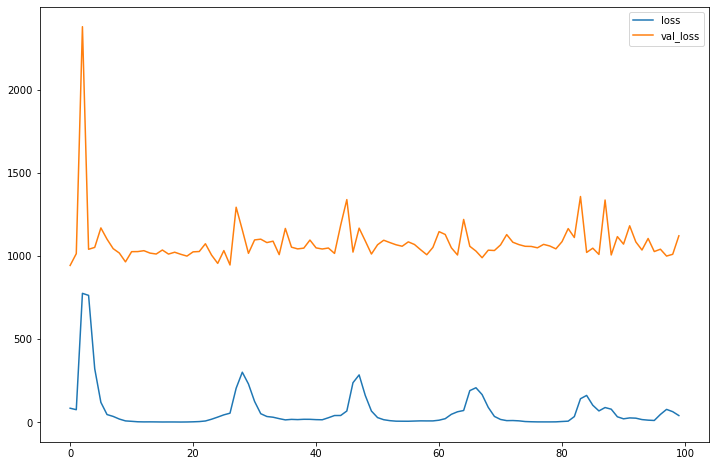

In [73]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [74]:
pred=model.predict(x_test)

In [75]:
(mean_squared_error(y_test,pred))**.5

33.49036246656424

In [76]:
r2_score(y_test,pred) 

0.9624158774753884

# Clustering

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [80]:
df_clust=df

In [81]:
x=pd.get_dummies(df_clust,drop_first=True)

In [82]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
preds=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        #model-model fit(x) 
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
        preds.append(pred)

In [83]:
clust(10)

Number of cluster 2, silhouette 0.9674984559918266
Number of cluster 3, silhouette 0.8997942431520038
Number of cluster 4, silhouette 0.8761641630998941
Number of cluster 5, silhouette 0.8779902271957435
Number of cluster 6, silhouette 0.8801457221523273
Number of cluster 7, silhouette 0.6742772546430492
Number of cluster 8, silhouette 0.7800207627220587
Number of cluster 9, silhouette 0.679664028063438
Number of cluster 10, silhouette 0.6796655431284307


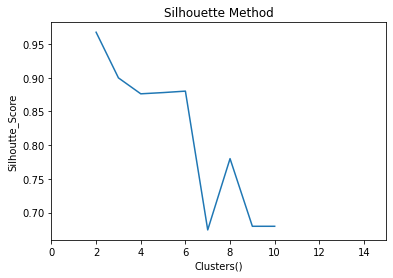

In [84]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

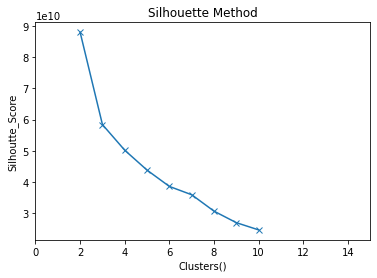

In [85]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

No handles with labels found to put in legend.


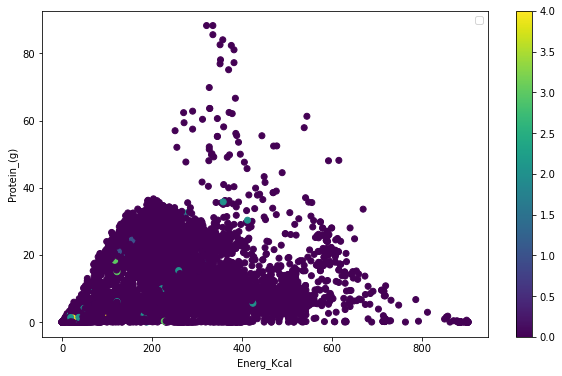

In [87]:
#If clustering is done for 4
plt.figure(figsize=(10,6))
plt.scatter(x["Energ_Kcal"],x["Protein_(g)"],c=preds[3])
plt.xlabel("Energ_Kcal")
plt.ylabel("Protein_(g)")
plt.legend()
plt.colorbar()
plt.show()

No handles with labels found to put in legend.


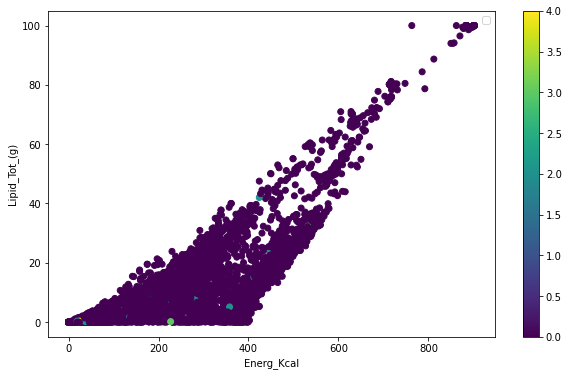

In [88]:
#If clustering is done for 4
plt.figure(figsize=(10,6))
plt.scatter(x["Energ_Kcal"],x["Lipid_Tot_(g)"],c=preds[3])
plt.xlabel("Energ_Kcal")
plt.ylabel("Lipid_Tot_(g)")
plt.legend()
plt.colorbar()
plt.show()

In [89]:
df_clust["cluster"]=preds[3]

In [92]:
df_clust[["Shrt_Desc","Energ_Kcal","cluster"]].sample(20).sort_index()

,Shrt_Desc,Energ_Kcal,cluster
336,babyfood tropical fruit medley,51,0
973,guinea hen meat&skn raw,158,0
1316,soup bean&ham cnd red na prep w/h2o or rts,81,0
1700,hormel pillow pak sliced turkey pepperoni,243,0
1825,cereals rte malt-o-meal corn bursts,385,0
1956,cereals quaker inst oatmeal banana bread dry,368,0
2161,blackberry juc cnd,38,0
2659,pork frsh loin sirloin (chops) bnless ln&fat c...,170,0
3441,peppers swt grn frz chopd ckd bld drnd w/salt,16,0
3772,"beef shrt loin t-bone steak bone-in ln 1/8"" fa...",160,0


<AxesSubplot:>

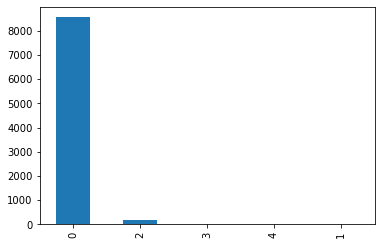

In [95]:
df_clust["cluster"].value_counts().plot.bar()